In [4]:
import tensorflow as tf
import import_ipynb
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras import layers

from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model, Sequential

from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
import cv2
import os 
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import imshow
%matplotlib inline

from keras import backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)


In [5]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [7]:
train = ImageDataGenerator(rescale= 1./255)

validation = ImageDataGenerator(rescale= 1./255)

test= ImageDataGenerator(rescale= 1./255)

In [8]:
train_dataset= train.flow_from_directory('basedata/training', 
                                         target_size= (224, 224),
                                         class_mode= 'categorical')

validation_dataset= validation.flow_from_directory('basedata/validation', 
                                                    target_size= (224, 224),
                                                    class_mode= 'categorical')  
test_dataset= test.flow_from_directory('basedata/test',
                                       target_size= (224, 224),
                                       class_mode= 'categorical') 


Found 1400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [9]:
x= mobile.layers[-6].output
predictions= Dense(2, activation = 'softmax')(x)
model= Model(inputs= mobile.input, outputs= predictions)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [11]:
for layer in model.layers[:-5]:
    layer.trainable= False

In [12]:
model.compile(optimizer= Adam(lr= 1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history= model.fit(train_dataset, 
                   steps_per_epoch= 3, 
                   validation_data= validation_dataset, 
                   validation_steps= 3,
                   shuffle=2, 
                   verbose=1, 
                   epochs = 5, 
                   batch_size = 32)

Epoch 1/5
3/3 [==============================] - 23s 8s/step - loss: 0.7411 - accuracy: 0.5833 - val_loss: 0.7303 - val_accuracy: 0.6250
Epoch 2/5
3/3 [==============================] - 20s 7s/step - loss: 0.4363 - accuracy: 0.8229 - val_loss: 1.1306 - val_accuracy: 0.6146
Epoch 3/5
3/3 [==============================] - 18s 6s/step - loss: 0.3690 - accuracy: 0.8229 - val_loss: 1.1606 - val_accuracy: 0.6042
Epoch 4/5
3/3 [==============================] - 17s 6s/step - loss: 0.2700 - accuracy: 0.8750 - val_loss: 1.1177 - val_accuracy: 0.6146
Epoch 5/5
3/3 [==============================] - 19s 6s/step - loss: 0.2392 - accuracy: 0.8854 - val_loss: 1.3410 - val_accuracy: 0.5625


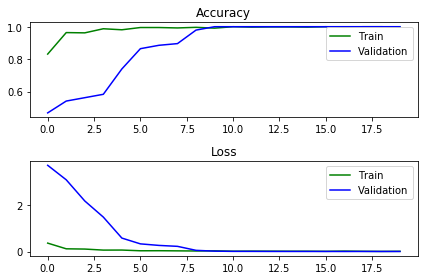


train_accuracy :  [0.831250011920929, 0.9637500047683716, 0.9621211886405945, 0.9873737096786499, 0.9810606241226196, 0.9950000047683716, 0.9949495196342468, 0.9924242496490479, 0.9962121248245239, 0.9911616444587708, 1.0, 0.997474730014801, 0.9987373948097229, 0.9987373948097229, 0.9975000023841858, 1.0, 0.9962499737739563, 1.0, 1.0, 0.9975000023841858]
valid_accuracy :  [0.46875, 0.5416666865348816, 0.5625, 0.5833333134651184, 0.7395833134651184, 0.8645833134651184, 0.8854166865348816, 0.8958333134651184, 0.9791666865348816, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
train_err :  [0.36313319206237793, 0.11832228302955627, 0.10742846131324768, 0.06245872378349304, 0.06473080813884735, 0.03363678604364395, 0.03605997934937477, 0.030241014435887337, 0.024354467168450356, 0.030785396695137024, 0.015545533038675785, 0.01892549730837345, 0.017154593020677567, 0.014662154950201511, 0.015107113867998123, 0.0098710423335433, 0.020109377801418304, 0.011257804930210114, 0.006242373

In [11]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
# plot loss and accuracy
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color="g", label="Train")
plt.plot(history.history["val_accuracy"], color="b", label="Validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print()
train_accuracy = history.history["accuracy"]
valid_accuracy = history.history["val_accuracy"]

train_err = history.history["loss"]
valid_err = history.history["val_loss"]


print("train_accuracy : ", train_accuracy)
print("valid_accuracy : ", valid_accuracy)
print("train_err : ", train_err)
print("valid_err : ", valid_err)

In [14]:
test_labels= test_dataset.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
test_dataset.class_indices

{'Exudates': 0, 'Normal': 1}

In [16]:
predictions= model.predict(test_dataset, steps=1, verbose= 0)


In [17]:
for i in predictions:
    print(i)

[2.1259139e-04 9.9978739e-01]
[0.00273304 0.997267  ]
[0.01048101 0.98951906]
[0.00485689 0.9951432 ]
[0.00164446 0.99835557]
[0.00410979 0.9958902 ]
[9.317452e-04 9.990683e-01]
[9.9761986e-05 9.9990022e-01]
[0.00170798 0.998292  ]
[6.5870467e-04 9.9934131e-01]
[0.00138735 0.99861264]
[0.01228835 0.9877116 ]
[9.0390496e-04 9.9909616e-01]
[0.00797986 0.9920202 ]
[5.4202148e-05 9.9994576e-01]
[0.01240992 0.9875901 ]
[3.5085544e-04 9.9964917e-01]
[3.097296e-04 9.996903e-01]
[0.00250937 0.99749064]
[1.2361717e-04 9.9987638e-01]
[0.01352607 0.9864739 ]
[3.5867933e-04 9.9964130e-01]
[0.00865947 0.9913406 ]
[0.00237935 0.99762064]
[0.00113979 0.99886024]
[1.5278537e-04 9.9984717e-01]
[6.1286293e-04 9.9938715e-01]
[0.01125083 0.98874915]
[7.2123995e-04 9.9927872e-01]
[0.00992078 0.9900793 ]


In [18]:
rounded_predictions= np.argmax(predictions, axis=-1)

In [19]:
for i in rounded_predictions:
    print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [20]:
test_dataset.class_indices

{'Exudates': 0, 'Normal': 1}

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

score, accuracy = model.evaluate(test_dataset,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', accuracy)

1/1 [==============================] - 0s 2ms/step - loss: 2.9870 - accuracy: 0.5000
Test score: 2.98695707321167
Test accuracy: 0.5
